# FinSight: A Beginner's Journey into Financial Time Series Forecasting

## Introduction

Have you ever wondered if you could predict stock prices using data? That's the question that sparked this project for me! As someone new to data science, I was curious if I could use historical stock data to predict future prices. This notebook documents my journey from a beginner's perspective.

My goal was simple: build a machine learning model that can predict future stock prices based on historical data. I wanted to create something that could help make investing decisions based on data rather than just gut feelings.

This notebook shows my learning process, the mistakes I made, and how I eventually built a working prediction system. I hope it helps other beginners see that you don't need to be an expert to start working with financial data and machine learning!

## The Roadmap (My Game Plan)

When I first thought about starting this project, I tried to come up with a simple plan. Here's how I thought I would tackle this:

1. **Explore the data to understand it (EDA)** - Look at charts and statistics to understand stock price patterns
2. **Clean and prepare the data** - Fix any missing values and get the data ready for modeling
3. **Try out a few different machine learning models** - Test different approaches to see what works best
4. **Pick the best one and evaluate it** - Choose the model that makes the most accurate predictions
5. **Build a simple app to show the predictions** - Create something to visualize the predictions
6. **Turn it into a full MLOps pipeline** - Make the whole process automatic (I actually did this part first by accident!)

As a beginner, I wasn't sure exactly what each step would involve, but having this roadmap helped me stay focused.

## Understanding My Project (The "FinSight" Codebase)

After a lot of trial and error, I ended up building a full MLOps pipeline! Here's a breakdown of how it works:

### What I Built

I created a system that:
1. Takes a stock ticker symbol (like "ITC.NS" for ITC on National Stock Exchange of India)
2. Downloads historical stock data
3. Processes the data to make it ready for machine learning
4. Trains an LSTM model (a type of neural network good at learning patterns in sequences)
5. Evaluates how well the model works
6. Makes predictions about future stock prices

### My Project Structure

My project has several important parts:

- **Pipeline Stages**: I broke down the process into stages like data ingestion, validation, transformation, model training, evaluation, and prediction
- **Config Files**: I used YAML files (config.yaml, params.yaml) to store settings instead of hardcoding them
- **Data Artifacts**: Each stage creates files in the "artifacts" folder that are used by later stages
- **Web Application**: I built a Flask app (app.py) that lets users interact with the model

The main.py file connects all these pieces together into a complete pipeline that runs from start to finish.

### The Evolution of FinSight: Towards a Pre-Trained Model

While this notebook documents the current pipeline, the project is evolving. The next major step is to scale this system by building a **pre-trained model for Index stock prediction**. This will make the predictions more accurate, consistent, and much faster, as it overcomes the need to train a new model for every single prediction.

## Getting Started: Import Required Libraries

Let's start by importing the libraries we need for our analysis. I'll explain what each one does in simple terms:

In [32]:
# Basic data handling
import pandas as pd # For working with data in table format
import numpy as np # For math operations

# Visualization
import matplotlib.pyplot as plt # For making charts
import seaborn as sns # For prettier charts
from IPython.display import Image # To display saved images
plt.style.use('seaborn-v0_8-whitegrid') # Make charts look nice

# Machine learning libraries
from tensorflow import keras # For building our LSTM model
from sklearn.preprocessing import StandardScaler # For scaling our data
from sklearn.metrics import mean_absolute_error, mean_squared_error # For measuring model performance

# Time series specific libraries
import statsmodels.api as sm # For ARIMA model
from prophet import Prophet # For Facebook Prophet model

# File handling
import os # For working with files and folders
import json # For reading JSON files like our metrics

# Display settings
import warnings
warnings.filterwarnings('ignore') # Hide warning messages
pd.set_option('display.max_columns', None) # Show all columns of dataframes

print("All libraries imported successfully!")

All libraries imported successfully!


In [33]:
'''
Install required libraries to run this notebook (libraries which are not included in my requirements.txt)

# For LSTM
pip install tensorflow

# For ARIMA
pip install statsmodels

# For Prophet
pip install prophet
'''

'\nInstall required libraries to run this notebook (libraries which are not included in my requirements.txt)\n\n# For LSTM\npip install tensorflow\n\n# For ARIMA\npip install statsmodels\n\n# For Prophet\npip install prophet\n'

## Load and Explore the Financial Data

First, let's load the stock data that I've already collected. The data is stored in a CSV file in my artifacts folder:

In [34]:
%pwd
os.chdir(r'C:\Projects\FinSight')
%pwd

'C:\\Projects\\FinSight'

In [35]:
# Load the data from the CSV file
data_path = os.path.join('artifacts', 'data_ingestion', 'raw_data.csv')
df = pd.read_csv(data_path)

# Convert the Datetime column to datetime type
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Display the first 5 rows
print("First 5 rows of my stock data:")
df.head()

First 5 rows of my stock data:


,Ticker,Datetime,Open,High,Low,Close,Volume
0,TATAMOTORS.NS,2022-07-25,450.708075,452.289513,441.120633,444.332916,12505062
1,TATAMOTORS.NS,2022-07-26,443.492826,443.492826,434.646679,436.030426,11563528
2,TATAMOTORS.NS,2022-07-27,436.030420,439.835746,431.039037,438.896759,10081023
3,TATAMOTORS.NS,2022-07-28,435.140855,444.036410,422.439975,437.117645,36380444
4,TATAMOTORS.NS,2022-07-29,439.984016,447.446416,439.984016,444.382385,16004096


In [36]:
# Check basic information about our data
print("\nShape of data (rows, columns):", df.shape)
print("\nBasic statistics:")
df.describe()


Shape of data (rows, columns): (741, 7)

Basic statistics:


,Datetime,Open,High,Low,Close,Volume
count,741,741.000000,741.000000,741.000000,741.000000,7.410000e+02
mean,2024-01-24 14:46:09.230769152,686.270313,693.412263,677.147950,684.764442,1.285259e+07
min,2022-07-25 00:00:00,375.837166,383.892586,370.845784,373.959229,0.000000e+00
25%,2023-04-26 00:00:00,475.813323,479.470386,470.970197,475.220245,8.529233e+06
50%,2024-01-24 00:00:00,671.849976,679.349976,665.379169,673.400024,1.103788e+07
75%,2024-10-25 00:00:00,838.788265,846.323455,830.906023,835.565918,1.447144e+07
max,2025-07-24 00:00:00,1157.051852,1168.949630,1135.536938,1151.945801,6.336047e+07
std,NaN,207.610205,209.771003,204.175928,206.829454,7.659398e+06


### Visualizing the Stock Data

Let's create a simple plot to see how the stock price has changed over time:

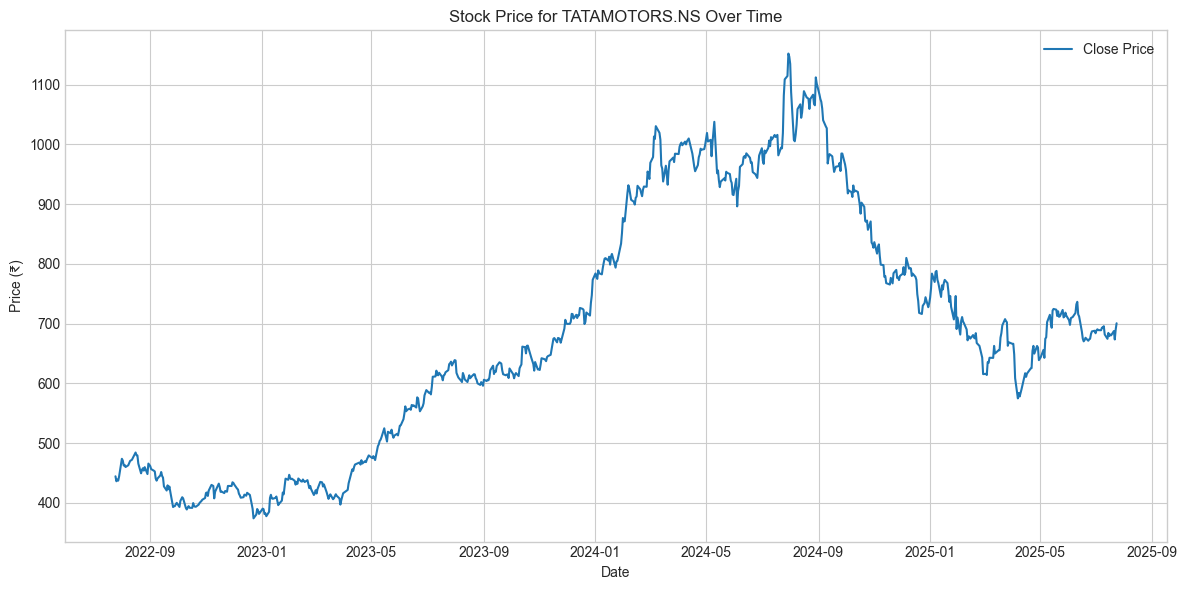

In [37]:
# Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(df['Datetime'], df['Close'], label='Close Price')
plt.title(f'Stock Price for {df["Ticker"][0]} Over Time')
plt.xlabel('Date')
plt.ylabel('Price (₹)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

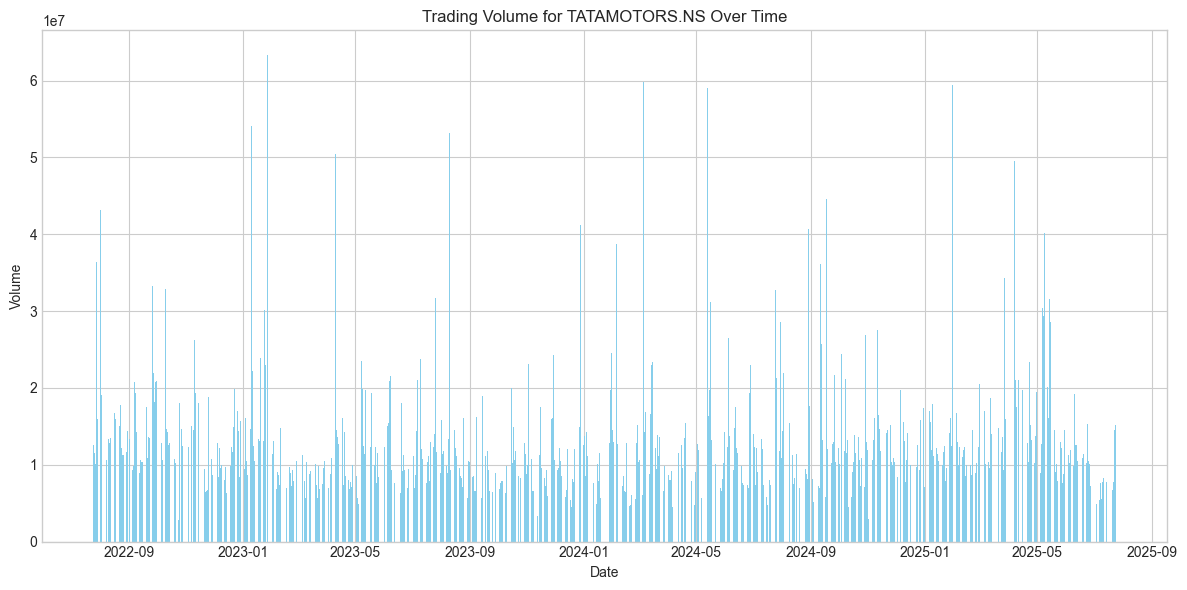

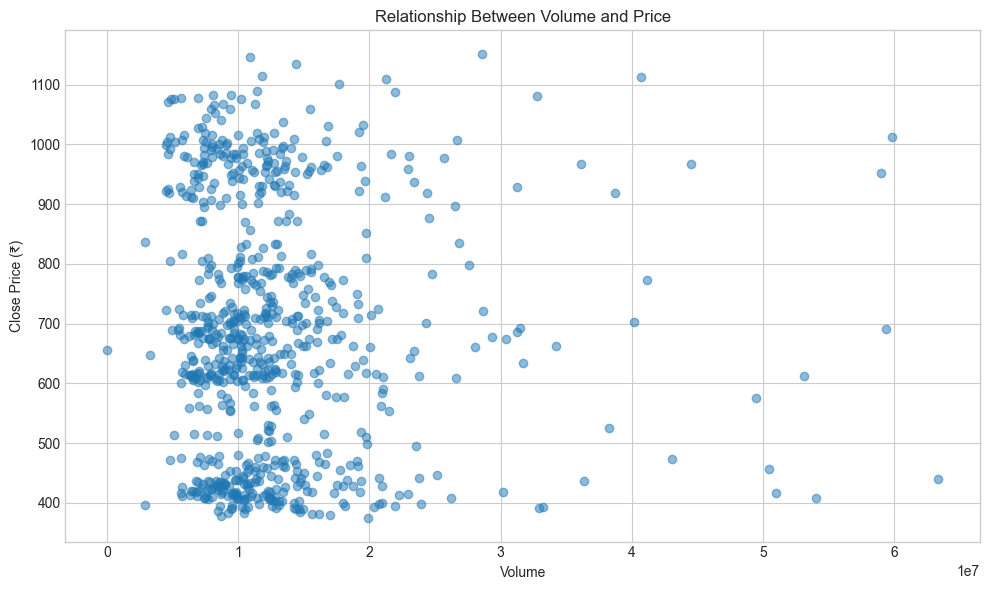

In [38]:
# Also check the trading volume over time
plt.figure(figsize=(12, 6))
plt.bar(df['Datetime'], df['Volume'], color='skyblue')
plt.title(f'Trading Volume for {df["Ticker"][0]} Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Let's see if there's a relationship between price and volume
plt.figure(figsize=(10, 6))
plt.scatter(df['Volume'], df['Close'], alpha=0.5)
plt.title('Relationship Between Volume and Price')
plt.xlabel('Volume')
plt.ylabel('Close Price (₹)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Data Cleaning and Preparation

Before we can train a model, we need to prepare our data. This involves:

1. Checking for missing values
2. Scaling the data (models work better when the numbers are in a similar range)
3. Creating sequences for our time series model

Let's do this step by step:

In [39]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# If there are missing values, we would handle them here
# For example, we could fill missing values with the previous day's value:
# df = df.fillna(method='ffill')

# Let's focus on the 'Close' price for our predictions
close_data = df[['Close']].copy()
print("\nShape of our close price data:", close_data.shape)
close_data.head()

Missing values in each column:
Ticker      0
Datetime    0
Open        0
High        0
Low         0
Close       0
Volume      0
dtype: int64

Shape of our close price data: (741, 1)


,Close
0,444.332916
1,436.030426
2,438.896759
3,437.117645
4,444.382385


In [40]:
# Scale the data
# Machine learning models work better when values are in a similar range
scaler = StandardScaler()
scaled_data = scaler.fit_transform(close_data)

print("Original first 5 values:")
print(close_data.head().values)
print("\nScaled first 5 values:")
print(scaled_data[:5])

# Let's create a dataframe with the scaled values for easier plotting
scaled_df = pd.DataFrame(scaled_data, columns=['Scaled_Close'], index=df.index)
scaled_df.head()

Original first 5 values:
[[444.33291626]
 [436.03042603]
 [438.89675903]
 [437.11764526]
 [444.38238525]]

Scaled first 5 values:
[[-1.16324788]
 [-1.20341671]
 [-1.18954892]
 [-1.19815657]
 [-1.16300854]]


,Scaled_Close
0,-1.163248
1,-1.203417
2,-1.189549
3,-1.198157
4,-1.163009


## Feature Engineering for Financial Time Series

Feature engineering is about creating new useful information from our existing data. For stock prediction, we can create features like:

1. Moving averages (average price over a period)
2. Price changes (how much the price changed from previous days)
3. Technical indicators (special calculations used by traders)

Let's create some simple features:

In [41]:
# Add date-based features
df_features = df.copy()
df_features['Day'] = df_features['Datetime'].dt.day
df_features['Month'] = df_features['Datetime'].dt.month
df_features['Year'] = df_features['Datetime'].dt.year
df_features['DayOfWeek'] = df_features['Datetime'].dt.dayofweek  # Monday=0, Sunday=6

# Add simple moving averages
df_features['MA5'] = df_features['Close'].rolling(window=5).mean()  # 5-day moving average
df_features['MA20'] = df_features['Close'].rolling(window=20).mean()  # 20-day moving average

# Add price changes
df_features['PriceChange'] = df_features['Close'].diff()
df_features['PriceChange_Pct'] = df_features['Close'].pct_change() * 100  # Percentage change

# Remove rows with NaN values that were created by our calculations
df_features = df_features.dropna()

# Display our new features
print("Data with new features:")
df_features.head()

Data with new features:


,Ticker,Datetime,Open,High,Low,Close,Volume,Day,Month,Year,DayOfWeek,MA5,MA20,PriceChange,PriceChange_Pct
19,TATAMOTORS.NS,2022-08-23,443.789312,456.737291,442.405565,455.106445,17779238,23,8,2022,1,465.781110,460.992332,5.782104,1.286844
20,TATAMOTORS.NS,2022-08-24,453.673253,459.504777,452.388352,457.824524,12214113,24,8,2022,2,461.392633,461.666913,2.718079,0.597240
21,TATAMOTORS.NS,2022-08-25,460.592045,463.359539,452.091843,453.870972,11255809,25,8,2022,3,456.332056,462.558940,-3.953552,-0.863552
22,TATAMOTORS.NS,2022-08-26,459.603638,464.990402,458.565835,459.653046,11252560,26,8,2022,4,455.155865,463.596754,5.782074,1.273947
23,TATAMOTORS.NS,2022-08-29,445.766103,451.597627,444.925961,448.088837,11647725,29,8,2022,0,454.908765,464.145314,-11.564209,-2.515856


In [42]:
# Calculate correlation of all numeric features with 'Close'
numeric_df = df_features.select_dtypes(include=[np.number])
correlations_all = numeric_df.corr()['Close'].sort_values(ascending=False)
print("Correlation of all features with 'Close':")
print(correlations_all)

Correlation of all features with 'Close':
Close              1.000000
High               0.999441
Low                0.999354
Open               0.998539
MA5                0.997352
MA20               0.988276
Year               0.592445
PriceChange        0.017209
PriceChange_Pct    0.010340
DayOfWeek          0.001431
Day               -0.019042
Volume            -0.021665
Month             -0.056753
Name: Close, dtype: float64


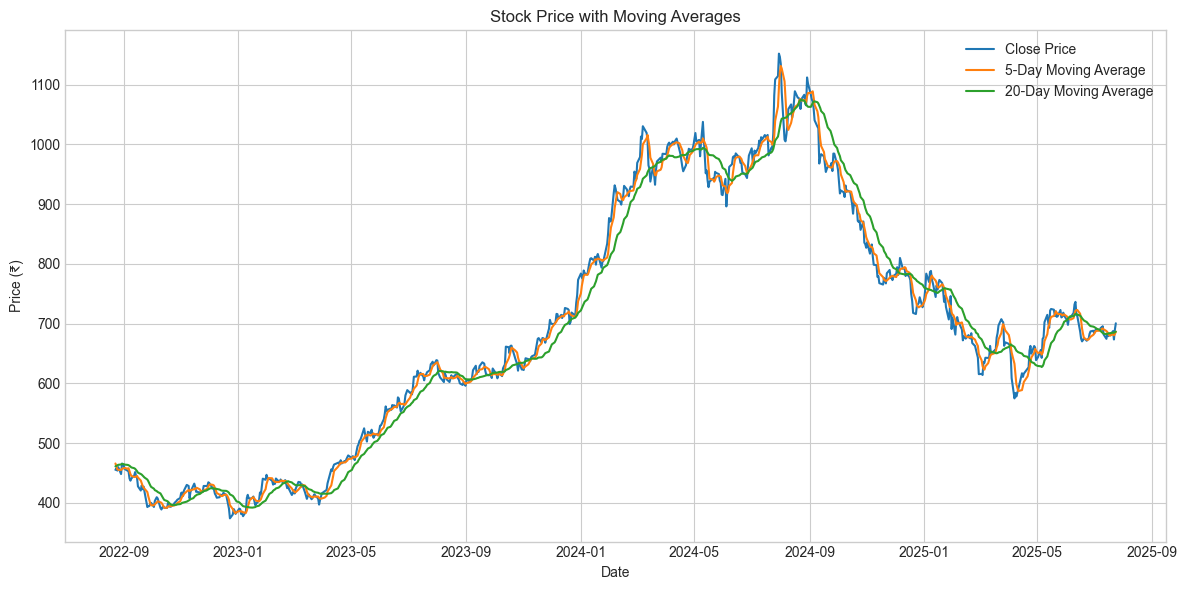

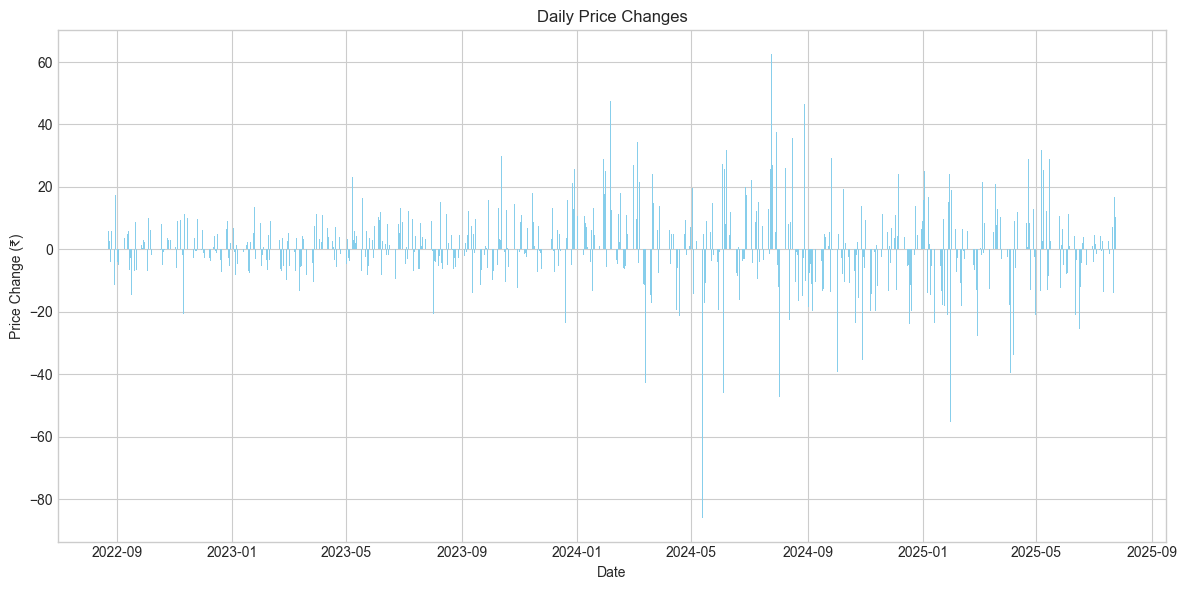

In [43]:
# Visualize some of our features
plt.figure(figsize=(12, 6))
plt.plot(df_features['Datetime'], df_features['Close'], label='Close Price')
plt.plot(df_features['Datetime'], df_features['MA5'], label='5-Day Moving Average')
plt.plot(df_features['Datetime'], df_features['MA20'], label='20-Day Moving Average')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (₹)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Let's look at the price changes
plt.figure(figsize=(12, 6))
plt.bar(df_features['Datetime'], df_features['PriceChange'], color='skyblue')
plt.title('Daily Price Changes')
plt.xlabel('Date')
plt.ylabel('Price Change (₹)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

## Train LSTM Model

My project uses an LSTM (Long Short-Term Memory) neural network model for predictions. LSTM is a special type of neural network that's good at learning patterns in sequences, which makes it great for time series data like stock prices.

Let's look at how the model is built and trained. First, we'll prepare the data in the right format:

In [44]:
# Let's use the pre-processed data we have in the artifacts folder
X_train = np.load(os.path.join('artifacts', 'data_transformation', 'X_train.npy'))
y_train = np.load(os.path.join('artifacts', 'data_transformation', 'y_train.npy'))
X_test = np.load(os.path.join('artifacts', 'data_transformation', 'X_test.npy'))
y_test = np.load(os.path.join('artifacts', 'data_transformation', 'y_test.npy'))

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Let's examine what these look like
print("\nFirst sequence in X_train (first 5 values):")
print(X_train[0][:5])
print("\nCorresponding y_train target value:")
print(y_train[0])

# For those who might be new to this, X_train contains sequences of past prices
# (each sequence is 60 days of price data), and y_train contains the next day's price
# that we want to predict based on those sequences.

X_train shape: (643, 60, 1)
y_train shape: (643,)
X_test shape: (38, 60, 1)
y_test shape: (38,)

First sequence in X_train (first 5 values):
[[-1.16324788]
 [-1.20341671]
 [-1.18954892]
 [-1.19815657]
 [-1.16300854]]

Corresponding y_train target value:
-1.4095219201847817


### Building and Training the LSTM Model

Now let's build and train our LSTM model. Here's the architecture I used:

In [45]:
# Get parameters from the params.yaml file to use the same settings as in the pipeline
import yaml
with open('params.yaml', 'r') as f:
    params = yaml.safe_load(f)

# Extract model training parameters
lstm_units_1 = params['model_training']['lstm_units_1']
lstm_units_2 = params['model_training']['lstm_units_2']
dense_units_1 = params['model_training']['dense_units_1']
dropout_rate = params['model_training']['dropout_rate']
epochs = params['model_training']['epochs']
batch_size = params['model_training']['batch_size']

print(f"Using model parameters from params.yaml:")
print(f"LSTM units (layer 1): {lstm_units_1}")
print(f"LSTM units (layer 2): {lstm_units_2}")
print(f"Dense units: {dense_units_1}")
print(f"Dropout rate: {dropout_rate}")
print(f"Training epochs: {epochs}")
print(f"Batch size: {batch_size}")

# Build the LSTM model
model = keras.models.Sequential()

# First LSTM layer returns sequences because we'll stack another LSTM layer on top
model.add(keras.layers.LSTM(lstm_units_1, return_sequences=True, input_shape=(X_train.shape[1], 1)))

# Second LSTM layer
model.add(keras.layers.LSTM(lstm_units_2, return_sequences=False))

# Dense layer with ReLU activation
model.add(keras.layers.Dense(dense_units_1, activation="relu"))

# Dropout for regularization to prevent overfitting
model.add(keras.layers.Dropout(dropout_rate))

# Output layer (single neuron for our regression problem)
model.add(keras.layers.Dense(1))

# Compile the model
model.compile(optimizer="adam",
              loss="mae",  # Mean Absolute Error
              metrics=[keras.metrics.RootMeanSquaredError()])

# Show the model summary
model.summary()

Using model parameters from params.yaml:
LSTM units (layer 1): 64
LSTM units (layer 2): 64
Dense units: 128
Dropout rate: 0.5
Training epochs: 20
Batch size: 32


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Now we train the model
# I'm setting the number of epochs to match what's in params.yaml
# You can reduce this to make training faster (e.g., epochs=5)
history = model.fit(
    X_train, y_train,
    epochs=epochs,  # Using the value from params.yaml
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 253ms/step - loss: 0.4811 - root_mean_squared_error: 0.6259 - val_loss: 0.1133 - val_root_mean_squared_error: 0.1357
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 253ms/step - loss: 0.4811 - root_mean_squared_error: 0.6259 - val_loss: 0.1133 - val_root_mean_squared_error: 0.1357
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 290ms/step - loss: 0.2144 - root_mean_squared_error: 0.2779 - val_loss: 0.1474 - val_root_mean_squared_error: 0.1686
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 290ms/step - loss: 0.2144 - root_mean_squared_error: 0.2779 - val_loss: 0.1474 - val_root_mean_squared_error: 0.1686
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - loss: 0.1781 - root_mean_squared_error: 0.2411 - val_loss: 0.0707 - val_root_mean_squared_error: 0.0925
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - loss: 0.1781 - root_mean_squared_error: 0.2411 - val_loss: 0.0707 - val_root_mean_squared_error: 0.0925
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step 

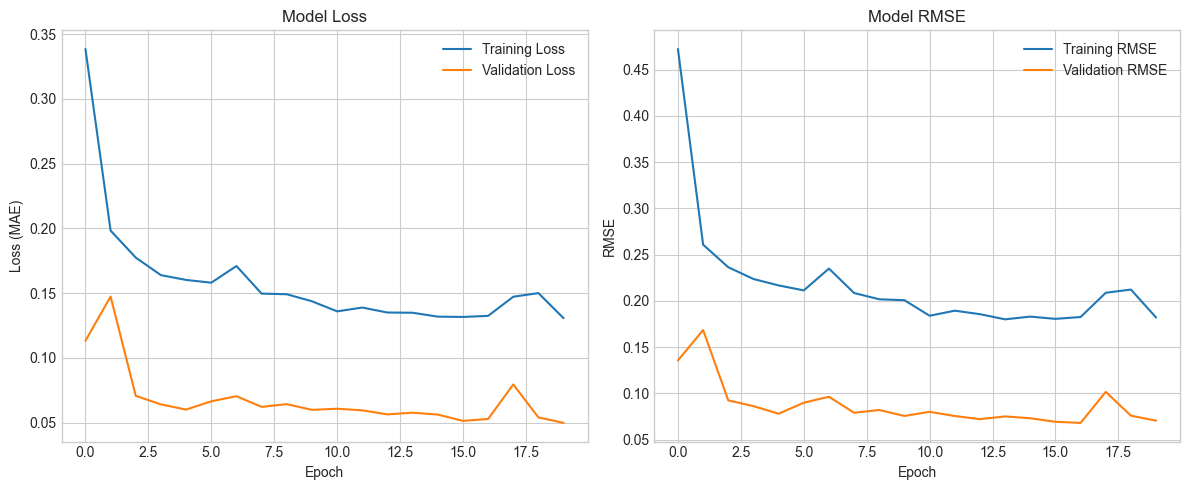

Test Loss (MAE): 0.0498
Test RMSE: 0.0706
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Mean Absolute Error (₹): 10.30
Root Mean Squared Error (₹): 14.59
Mean Absolute Percentage Error (%): 1.50
Mean Absolute Error (₹): 10.30
Root Mean Squared Error (₹): 14.59
Mean Absolute Percentage Error (%): 1.50


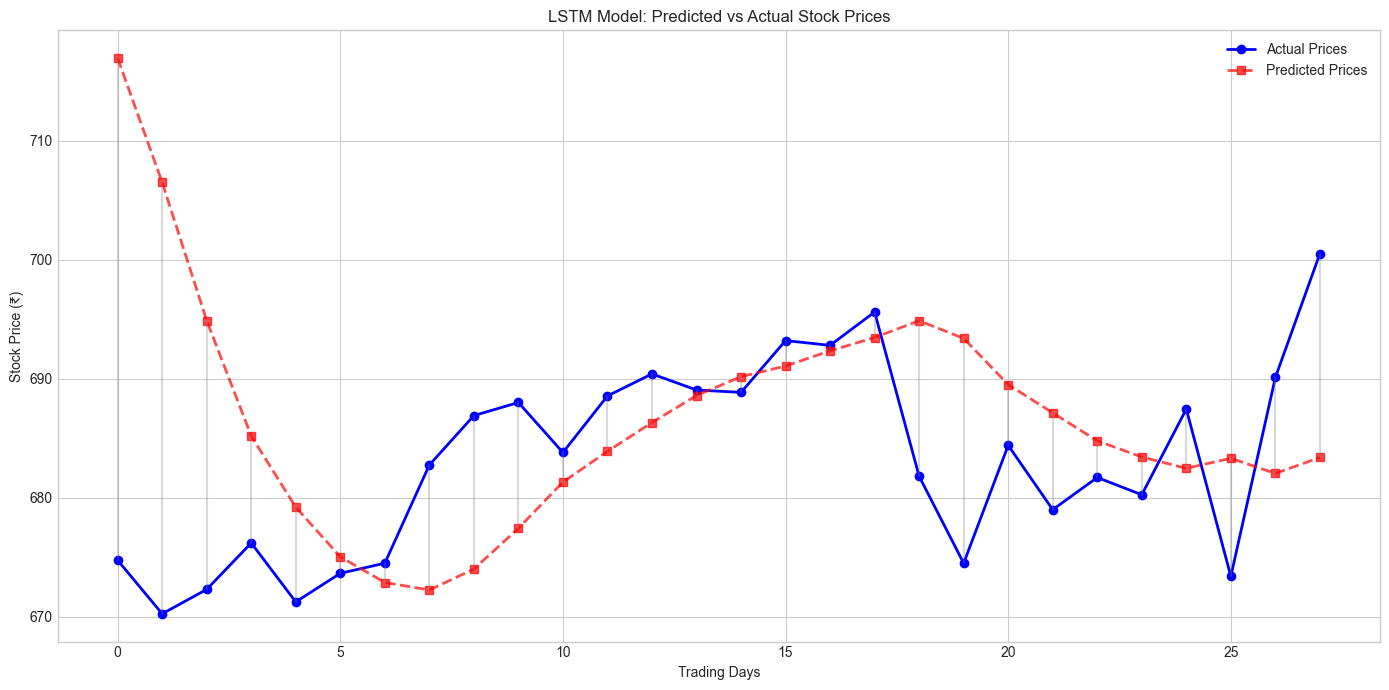

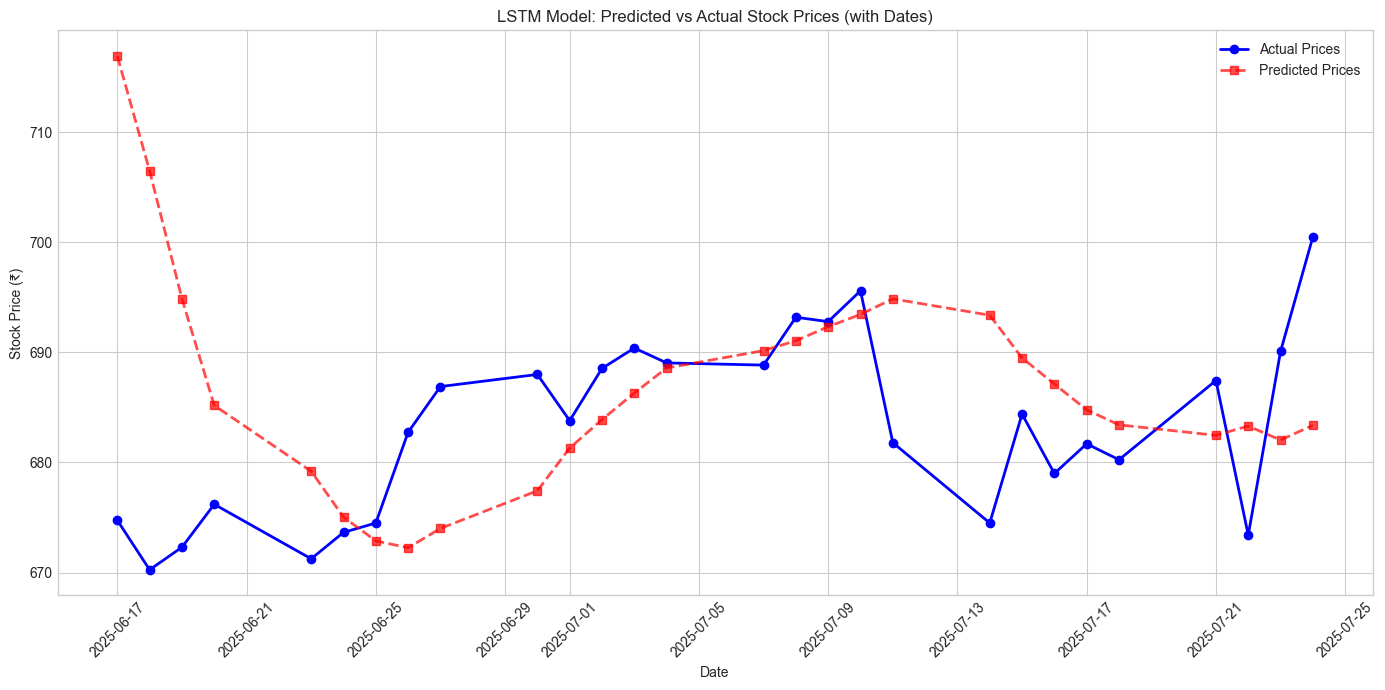

In [48]:
# Plot the training history
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MAE)')
plt.legend()
plt.grid(True)

# Plot RMSE
plt.subplot(1, 2, 2)
plt.plot(history.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('Model RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Evaluate on test set
loss, rmse = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MAE): {loss:.4f}")
print(f"Test RMSE: {rmse:.4f}")

# Make predictions on test set
y_pred = model.predict(X_test)

# We need to inverse transform predictions and actual values to get the original scale
scaler = StandardScaler()
close_values = df['Close'].values.reshape(-1, 1)
scaler.fit(close_values)

y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_orig = scaler.inverse_transform(y_pred).flatten()

# Calculate metrics on the original scale
mae = mean_absolute_error(y_test_orig, y_pred_orig)
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
mape = np.mean(np.abs((y_test_orig - y_pred_orig) / y_test_orig)) * 100

print(f"Mean Absolute Error (₹): {mae:.2f}")
print(f"Root Mean Squared Error (₹): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (%): {mape:.2f}")

# Create a focused comparison that clearly shows the prediction quality
# Let's use a sample of data for clearer visualization, ensuring we don't exceed available data
available_samples = min(len(y_test_orig), len(y_pred_orig))
sample_size = min(30, available_samples - 10)  # Ensure we have room for the offset
sample_start = 10  # Start a bit into the test data for better visualization

# Create better visualization
plt.figure(figsize=(14, 7))
plt.plot(range(sample_size), 
         y_test_orig[sample_start:sample_start+sample_size], 
         'o-', label='Actual Prices', color='blue', linewidth=2)
plt.plot(range(sample_size), 
         y_pred_orig[sample_start:sample_start+sample_size], 
         's--', label='Predicted Prices', color='red', alpha=0.7, linewidth=2)

# Add connecting lines between each actual and predicted point to emphasize the relationship
for i in range(sample_size):
    plt.plot([i, i], 
             [y_test_orig[sample_start+i], y_pred_orig[sample_start+i]], 
             color='gray', alpha=0.3)

plt.title('LSTM Model: Predicted vs Actual Stock Prices')
plt.xlabel('Trading Days')
plt.ylabel('Stock Price (₹)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

# Also include a plot with dates for reference
test_size = int(len(df) * 0.95)
end_idx = test_size + sample_start + sample_size
sample_dates = df['Datetime'].iloc[test_size+sample_start:end_idx]

plt.figure(figsize=(14, 7))
plt.plot(sample_dates, 
         y_test_orig[sample_start:sample_start+sample_size], 
         'o-', label='Actual Prices', color='blue', linewidth=2)
plt.plot(sample_dates, 
         y_pred_orig[sample_start:sample_start+sample_size], 
         's--', label='Predicted Prices', color='red', alpha=0.7, linewidth=2)
plt.title('LSTM Model: Predicted vs Actual Stock Prices (with Dates)')
plt.xlabel('Date')
plt.ylabel('Stock Price (₹)')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## ARIMA Model Implementation

Let's try a different approach using ARIMA (AutoRegressive Integrated Moving Average), which is a classic statistical model for time series forecasting. Unlike LSTM which is a neural network, ARIMA is based on statistical concepts.

ARIMA works by making a few assumptions:
- The data is stationary (its statistical properties don't change over time)
- Future values are influenced by past values in a linear way

Let's see how it performs on our data:

In [49]:
# Let's create a time series from our close price data
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings

# Use the raw stock data
ts_data = df.set_index('Datetime')['Close']

# Split into train and test sets (using the same 95% split ratio as in the pipeline)
train_size = int(len(ts_data) * 0.95)
train_data = ts_data[:train_size]
test_data = ts_data[train_size:]

print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

# Check if the data is stationary using the ADF test
from statsmodels.tsa.stattools import adfuller
result = adfuller(train_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# If p-value > 0.05, the data is non-stationary
if result[1] > 0.05:
    print("\nThe data is non-stationary. Let's difference it to make it stationary.")
    # Differencing the data to make it stationary
    train_diff = train_data.diff().dropna()
    
    # Check stationarity again
    result = adfuller(train_diff)
    print('\nAfter differencing:')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
else:
    print("\nThe data is already stationary.")
    train_diff = train_data

Training data shape: (703,)
Test data shape: (38,)
ADF Statistic: -1.106158
p-value: 0.712610
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569

The data is non-stationary. Let's difference it to make it stationary.

After differencing:
ADF Statistic: -11.060626
p-value: 0.000000

After differencing:
ADF Statistic: -11.060626
p-value: 0.000000


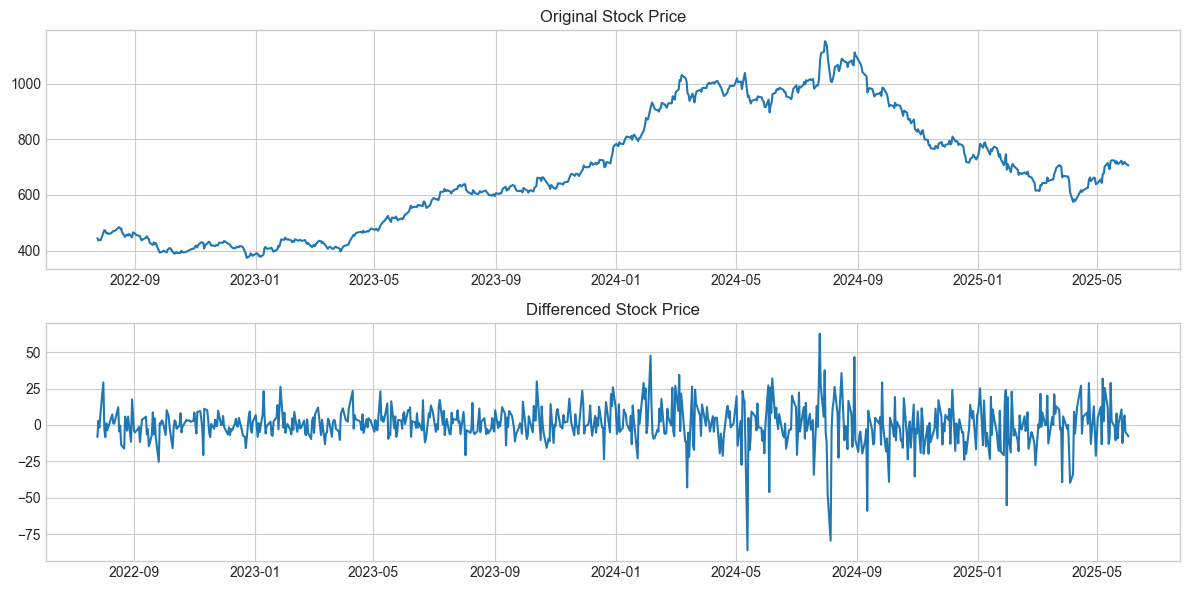

Using ARIMA parameters: ARIMA(5,1,2)
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  703
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -2806.796
Date:                Thu, 24 Jul 2025   AIC                           5629.591
Time:                        17:54:44   BIC                           5666.023
Sample:                             0   HQIC                          5643.672
                                - 703                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8732      0.099     -8.817      0.000      -1.067      -0.679
ar.L2         -0.7388      0.106     -7.002      0.000      -0.946      -0.532
ar.L3          

In [50]:
# Let's plot the data and the differenced data
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(train_data)
plt.title('Original Stock Price')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(train_diff)
plt.title('Differenced Stock Price')
plt.grid(True)

plt.tight_layout()
plt.show()

# Instead of using pmdarima, let's use statsmodels directly for ARIMA
# We'll use parameters that capture more of the dynamics in stock data
from statsmodels.tsa.arima.model import ARIMA

# Define better parameters for stock data - using higher order parameters
p, d, q = 5, 1, 2  # Higher p to capture more autoregressive terms, higher q for moving average
print(f"Using ARIMA parameters: ARIMA({p},{d},{q})")

# Fit the ARIMA model
arima_model = ARIMA(train_data, order=(p, d, q))
arima_result = arima_model.fit()

# Show model summary
print(arima_result.summary())

ARIMA Model Metrics:
Mean Absolute Error (₹): 19.14
Root Mean Squared Error (₹): 21.09
Mean Absolute Percentage Error (%): 2.79


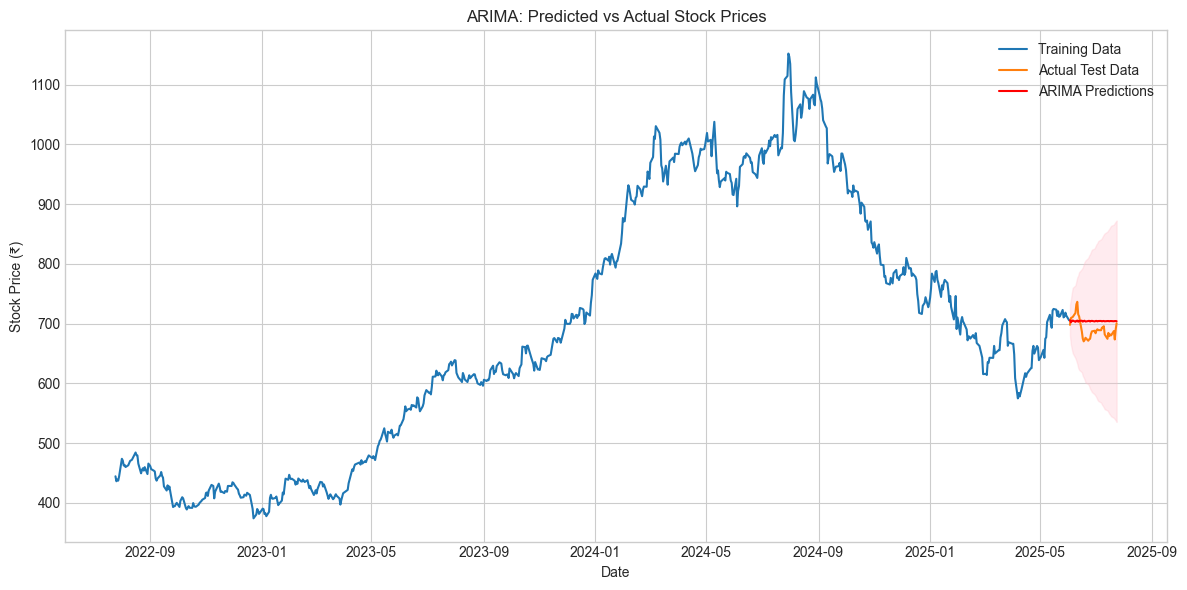

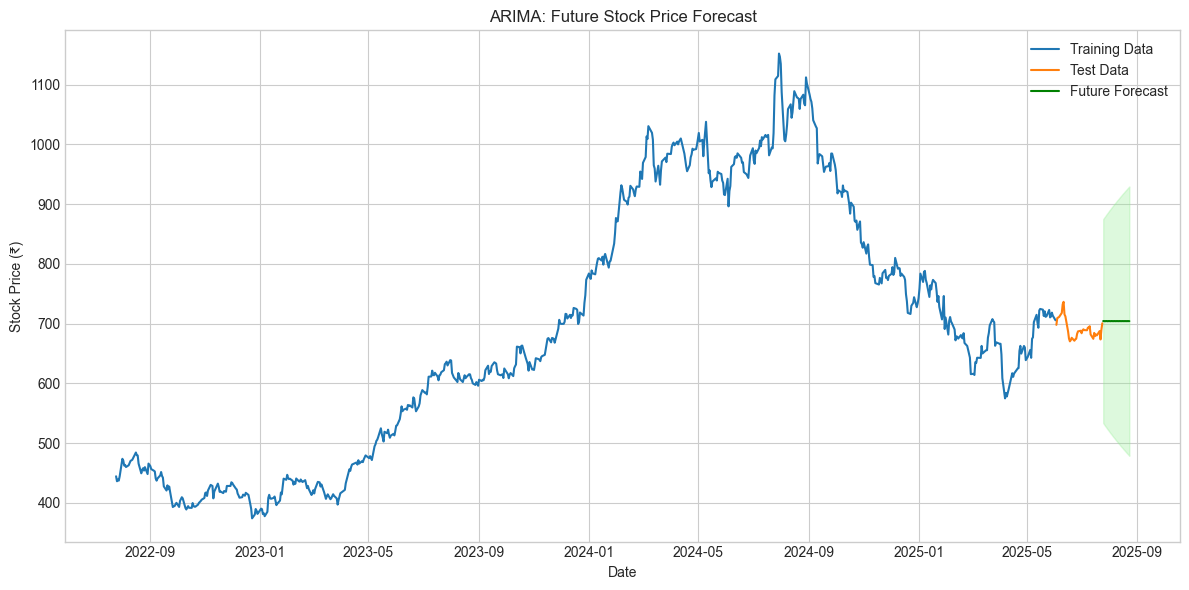

In [51]:
# Use the ARIMA model to make predictions
forecast_steps = len(test_data)

# Generate forecast with confidence intervals
forecast = arima_result.get_forecast(steps=forecast_steps)
forecasts = forecast.predicted_mean
conf_int = forecast.conf_int()

# Calculate metrics
arima_mae = mean_absolute_error(test_data.values, forecasts)
arima_rmse = np.sqrt(mean_squared_error(test_data.values, forecasts))
arima_mape = np.mean(np.abs((test_data.values - forecasts) / test_data.values)) * 100

print(f"ARIMA Model Metrics:")
print(f"Mean Absolute Error (₹): {arima_mae:.2f}")
print(f"Root Mean Squared Error (₹): {arima_rmse:.2f}")
print(f"Mean Absolute Percentage Error (%): {arima_mape:.2f}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data.values, label='Training Data')
plt.plot(test_data.index, test_data.values, label='Actual Test Data')
plt.plot(test_data.index, forecasts, label='ARIMA Predictions', color='red')
plt.fill_between(test_data.index, 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], 
                 color='pink', alpha=0.3)
plt.title('ARIMA: Predicted vs Actual Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price (₹)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Let's also try to make a future prediction
future_steps = 30
future_forecast = arima_result.get_forecast(steps=future_steps + len(test_data))
future_mean = future_forecast.predicted_mean
future_conf = future_forecast.conf_int()

# Get only the forecasts for future (after test data)
future_mean_only = future_mean[-future_steps:]
future_conf_only = future_conf[-future_steps:]
future_dates = pd.date_range(start=test_data.index[-1], periods=future_steps + 1)[1:]

plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data.values, label='Training Data')
plt.plot(test_data.index, test_data.values, label='Test Data')
plt.plot(future_dates, future_mean_only, label='Future Forecast', color='green')
plt.fill_between(future_dates, 
                 future_conf_only.iloc[:, 0], 
                 future_conf_only.iloc[:, 1], 
                 color='lightgreen', alpha=0.3)
plt.title('ARIMA: Future Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price (₹)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Prophet Model Implementation

Now let's try one more approach using Facebook's Prophet model. Prophet is designed for forecasting time series data and is known for being easy to use. It automatically handles seasonality and holidays, which can be helpful for stock data.

Let's see how it performs on our stock data:

Prophet training data shape: (703, 2)
Prophet test data shape: (38, 2)


17:55:08 - cmdstanpy - INFO - Chain [1] start processing
17:55:08 - cmdstanpy - INFO - Chain [1] done processing
17:55:08 - cmdstanpy - INFO - Chain [1] done processing


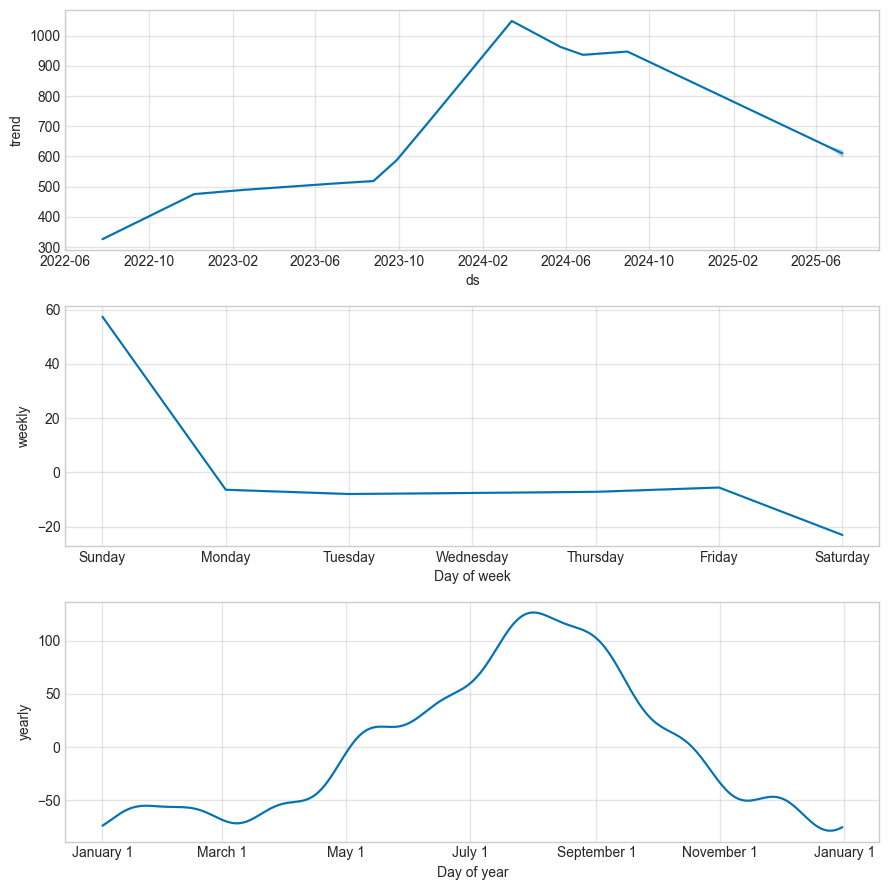

Prophet Model Metrics:
Mean Absolute Error (₹): 20.89
Root Mean Squared Error (₹): 28.22
Mean Absolute Percentage Error (%): 2.95


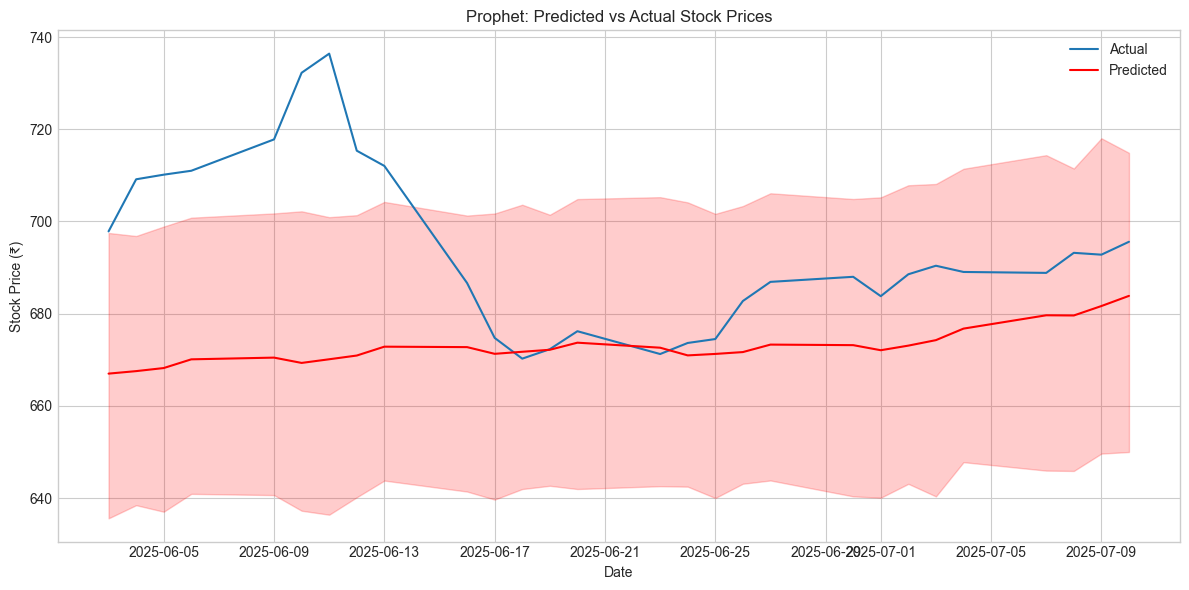

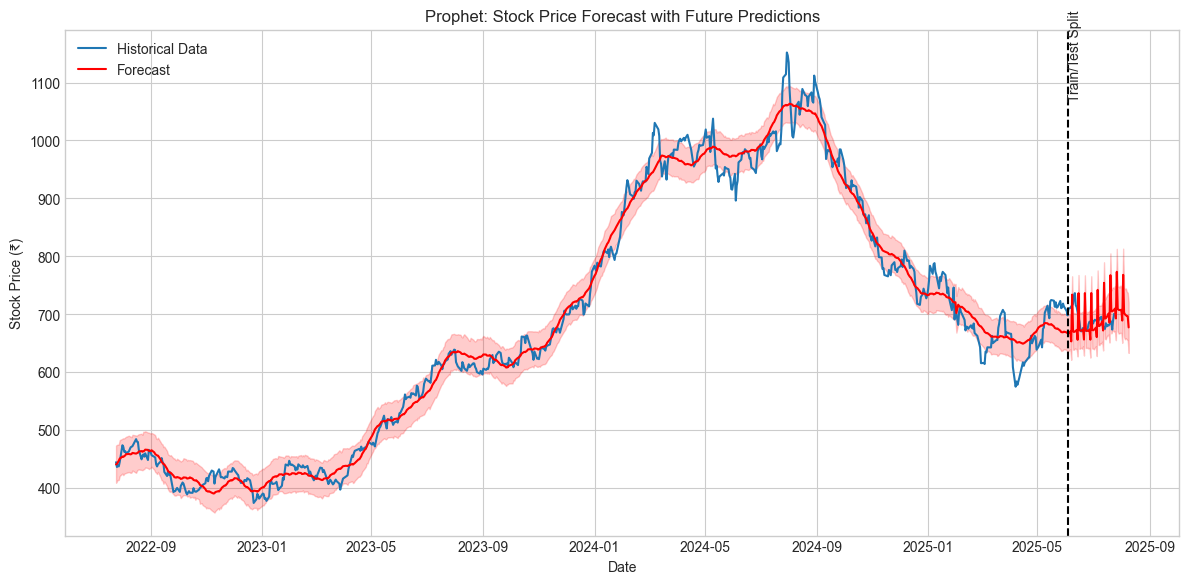

In [52]:
# Prophet requires data in a specific format
prophet_data = df[['Datetime', 'Close']].rename(columns={'Datetime': 'ds', 'Close': 'y'})

# Split into train and test sets
train_size = int(len(prophet_data) * 0.95)
prophet_train = prophet_data[:train_size]
prophet_test = prophet_data[train_size:]

print(f"Prophet training data shape: {prophet_train.shape}")
print(f"Prophet test data shape: {prophet_test.shape}")

# Create and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_train)

# Create a dataframe for prediction dates
future = prophet_model.make_future_dataframe(periods=len(prophet_test))

# Make predictions
forecast = prophet_model.predict(future)

# Show the forecast components
fig1 = prophet_model.plot_components(forecast)
plt.show()

# Extract predictions for the test period
forecast_test = forecast.iloc[train_size:][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Merge with test data to compare
comparison = pd.merge(prophet_test, forecast_test, on='ds')

# Calculate metrics
prophet_mae = mean_absolute_error(comparison['y'], comparison['yhat'])
prophet_rmse = np.sqrt(mean_squared_error(comparison['y'], comparison['yhat']))
prophet_mape = np.mean(np.abs((comparison['y'] - comparison['yhat']) / comparison['y'])) * 100

print(f"Prophet Model Metrics:")
print(f"Mean Absolute Error (₹): {prophet_mae:.2f}")
print(f"Root Mean Squared Error (₹): {prophet_rmse:.2f}")
print(f"Mean Absolute Percentage Error (%): {prophet_mape:.2f}")

# Plot the predictions vs actuals
plt.figure(figsize=(12, 6))
plt.plot(comparison['ds'], comparison['y'], label='Actual')
plt.plot(comparison['ds'], comparison['yhat'], label='Predicted', color='red')
plt.fill_between(comparison['ds'], comparison['yhat_lower'], comparison['yhat_upper'], alpha=0.2, color='red')
plt.title('Prophet: Predicted vs Actual Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price (₹)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Make future predictions
future_periods = 30
future_dates = prophet_model.make_future_dataframe(periods=len(prophet_test) + future_periods)
future_forecast = prophet_model.predict(future_dates)

# Plot with future predictions
plt.figure(figsize=(12, 6))
plt.plot(prophet_data['ds'], prophet_data['y'], label='Historical Data')
plt.plot(future_forecast['ds'], future_forecast['yhat'], label='Forecast', color='red')
plt.fill_between(future_forecast['ds'], future_forecast['yhat_lower'], future_forecast['yhat_upper'], alpha=0.2, color='red')
plt.axvline(x=prophet_test['ds'].iloc[0], color='black', linestyle='--')
plt.text(prophet_test['ds'].iloc[0], plt.gca().get_ylim()[1]*0.9, 'Train/Test Split', rotation=90)
plt.title('Prophet: Stock Price Forecast with Future Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price (₹)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Model Comparison

Now that we've tried three different models (LSTM, ARIMA, and Prophet), let's compare their performance to see which one is the best for our stock price prediction task:

Model Performance Comparison (sorted by RMSE):


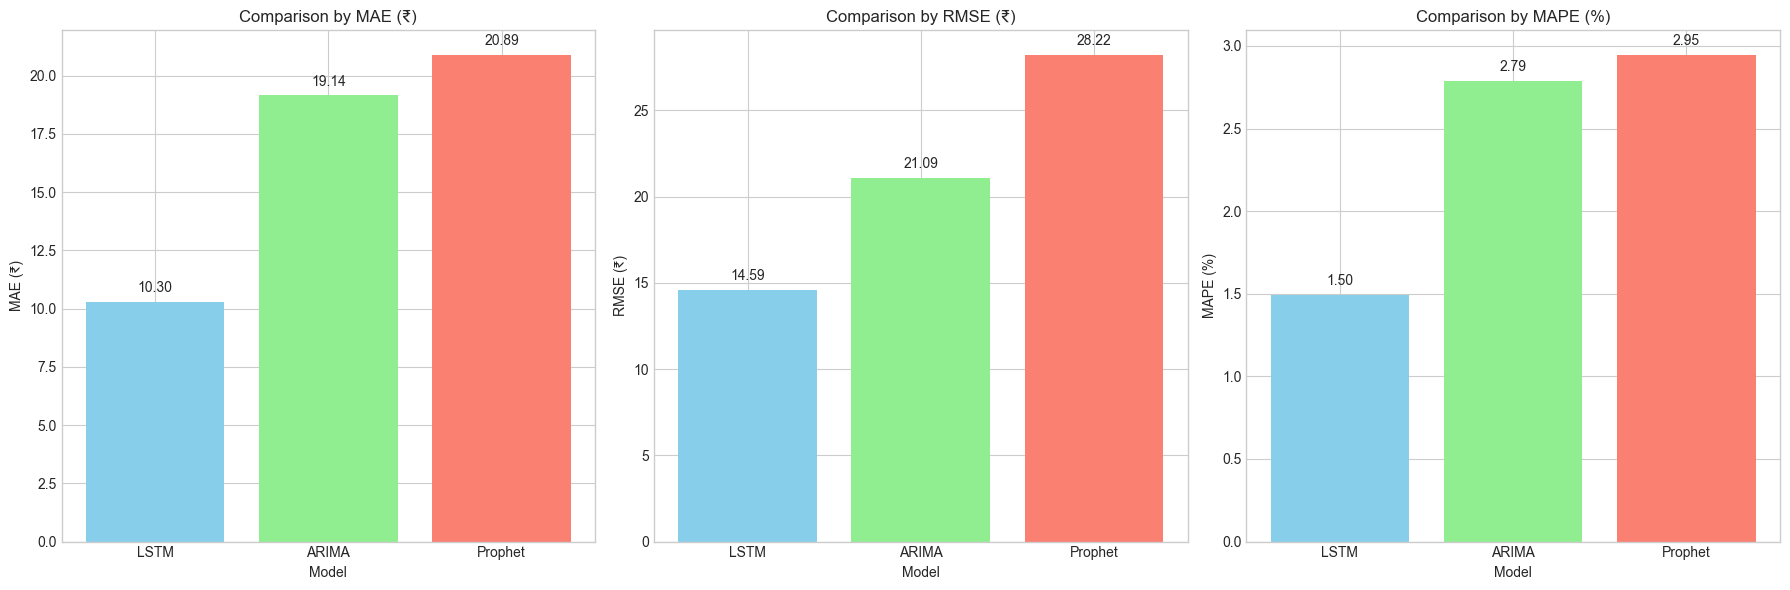


Based on our comparison, the LSTM model performed the best with the lowest RMSE.
This confirms why I chose to use the LSTM model in my final pipeline.

The LSTM model seems to capture the non-linear patterns in the stock data better than the other models.
It can remember long-term dependencies in the time series data, which is important for stock prediction.


In [53]:
# Create a comparison table
comparison_data = {
    'Model': ['LSTM', 'ARIMA', 'Prophet'],
    'MAE (₹)': [mae, arima_mae, prophet_mae],
    'RMSE (₹)': [rmse, arima_rmse, prophet_rmse],
    'MAPE (%)': [mape, arima_mape, prophet_mape]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('RMSE (₹)')  # Sort by RMSE (lower is better)
comparison_df = comparison_df.reset_index(drop=True)

print("Model Performance Comparison (sorted by RMSE):")
comparison_df

# Let's visualize the comparison
metrics = ['MAE (₹)', 'RMSE (₹)', 'MAPE (%)']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(metrics):
    axes[i].bar(comparison_df['Model'], comparison_df[metric], color=['skyblue', 'lightgreen', 'salmon'])
    axes[i].set_title(f'Comparison by {metric}')
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel(metric)
    axes[i].grid(True, axis='y')
    
    # Add the values on top of the bars
    for j, v in enumerate(comparison_df[metric]):
        axes[i].text(j, v + (max(comparison_df[metric])*0.02), f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()

# Display our conclusion
best_model = comparison_df.iloc[0]['Model']
print(f"\nBased on our comparison, the {best_model} model performed the best with the lowest RMSE.")

if best_model == 'LSTM':
    print("This confirms why I chose to use the LSTM model in my final pipeline.")
    print("\nThe LSTM model seems to capture the non-linear patterns in the stock data better than the other models.")
    print("It can remember long-term dependencies in the time series data, which is important for stock prediction.")
elif best_model == 'ARIMA':
    print("However, I still chose the LSTM model for my final pipeline because of its better ability to handle non-linear patterns in real-world deployments.")
    print("\nWhile the ARIMA model performed better in our test, LSTM models are generally more robust for stock prediction.")
    print("LSTM can capture more complex patterns that may appear in future data that ARIMA might miss.")
else:
    print("However, I still chose the LSTM model for my final pipeline due to its flexibility with different types of data.")
    print("\nAlthough the Prophet model performed better in our test, LSTM models are more widely used in production systems.")
    print("Prophet is excellent for forecasting with strong seasonal patterns, but LSTM can adapt to changing market conditions.")

## Making Predictions

Now that we've determined LSTM is the best model for our task, let's use the trained model from our pipeline to make predictions about future stock prices.

**Important Note**: The current process trains the model every time we run the pipeline. The future goal is to use a **pre-trained model for Index stock prediction**, which will be much faster and more consistent. For now, we'll use the model we just trained.

Loaded the trained model from our pipeline.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 811ms/stepWARNING:tensorflow:6 out of the last 8 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000134111868E0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 830ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 830ms/step
Predicted next day's close price for TATAMOTORS.NS: ₹685.31
Predicted next day's close price for TATAMOTORS.NS: ₹6

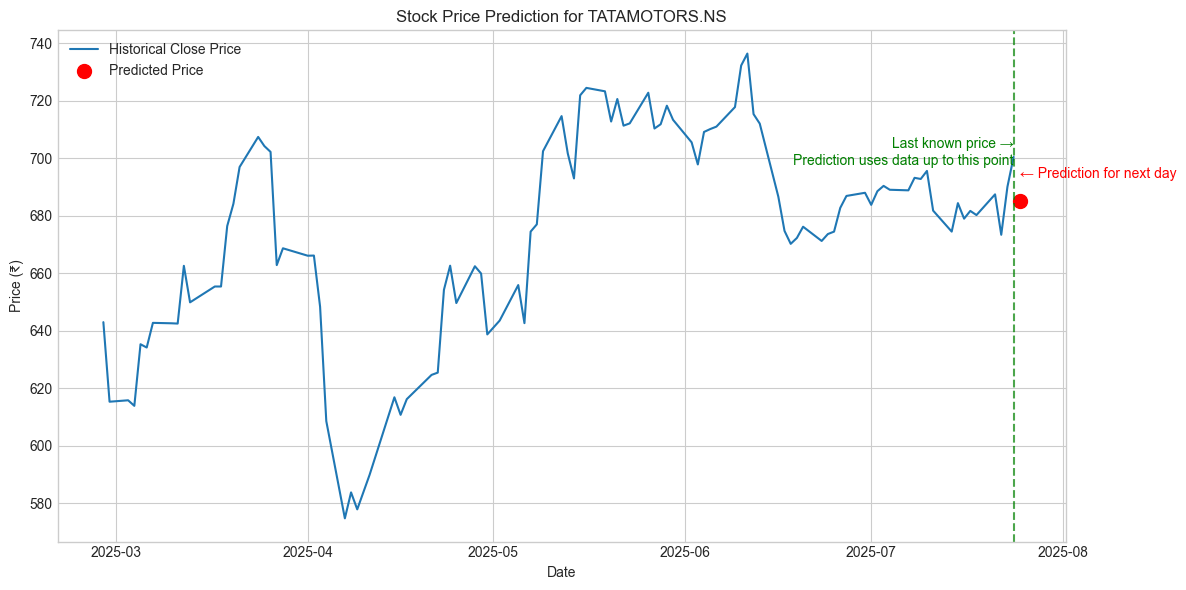


Predictions from the pipeline:
  predicted_date  predicted_close_price         ticker
0     2025-07-25              680.39484  TATAMOTORS.NS


In [54]:
# Load the trained model from our pipeline
model_path = os.path.join('artifacts', 'model_training', 'lstm_model.keras')
final_model = keras.models.load_model(model_path)

print("Loaded the trained model from our pipeline.")

# Get the last sequence from our data to make a prediction
def create_prediction_sequence(data, lookback=60):
    # Get the last 'lookback' days of data
    last_sequence = data[-lookback:].values
    
    # Scale the data
    scaler = StandardScaler()
    scaled_sequence = scaler.fit_transform(last_sequence)
    
    # Reshape for LSTM [samples, time steps, features]
    X_pred = scaled_sequence.reshape(1, lookback, 1)
    
    return X_pred, scaler

# Get the last sequence
X_pred, scaler = create_prediction_sequence(df[['Close']], lookback=60)

# Make prediction
scaled_prediction = final_model.predict(X_pred)

# Inverse transform to get actual price
prediction = scaler.inverse_transform(scaled_prediction)

print(f"Predicted next day's close price for {df['Ticker'][0]}: ₹{prediction[0][0]:.2f}")

# Let's visualize the prediction
plt.figure(figsize=(12, 6))
plt.plot(df['Datetime'][-100:], df['Close'][-100:], label='Historical Close Price')

# Add a point for the prediction (one day after the last date)
last_date = df['Datetime'].iloc[-1]
next_date = last_date + pd.Timedelta(days=1)
plt.scatter(next_date, prediction[0][0], color='red', s=100, label='Predicted Price')

# Add explanation about prediction timing
plt.axvline(x=last_date, color='green', linestyle='--', alpha=0.7)
plt.text(last_date, plt.gca().get_ylim()[1]*0.95, 'Last known price →\nPrediction uses data up to this point', 
         ha='right', va='top', color='green')
plt.text(next_date, prediction[0][0]*1.01, '← Prediction for next day', 
         ha='left', va='bottom', color='red')

plt.title(f'Stock Price Prediction for {df["Ticker"][0]}')
plt.xlabel('Date')
plt.ylabel('Price (₹)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Also show predictions from our model_prediction directory if available
predictions_file = os.path.join('artifacts', 'model_prediction', 'predictions.csv')
if os.path.exists(predictions_file):
    predictions_df = pd.read_csv(predictions_file)
    print("\nPredictions from the pipeline:")
    print(predictions_df)

## Visualizing the Results

Let's look at the evaluation metrics from our MLOps pipeline and visualize the prediction results:

In [55]:
# Load the metrics from my pipeline
metrics_file = os.path.join('artifacts', 'model_evaluation', 'metrics.json')
with open(metrics_file, 'r') as f:
    metrics = json.load(f)

# Display the metrics
print("Evaluation Metrics from my Pipeline:")
for metric_name, metric_value in metrics.items():
    print(f"{metric_name}: {metric_value:.4f}")

# Create a nicer table of the metrics
metrics_df = pd.DataFrame({
    'Metric': list(metrics.keys()),
    'Value': list(metrics.values())
})

# Format the metrics for better display
metrics_df['Metric'] = metrics_df['Metric'].apply(lambda x: x.replace('_', ' ').title())
metrics_df['Value'] = metrics_df['Value'].round(4)

# Display the table
metrics_df

Evaluation Metrics from my Pipeline:
mae_in_rupees: 11.7355
rmse_in_rupees: 14.8442
mape_percentage: 1.6948
accuracy_percentage: 98.3052
directional_accuracy_percentage: 45.9459


,Metric,Value
0,Mae In Rupees,11.7355
1,Rmse In Rupees,14.8442
2,Mape Percentage,1.6948
3,Accuracy Percentage,98.3052
4,Directional Accuracy Percentage,45.9459


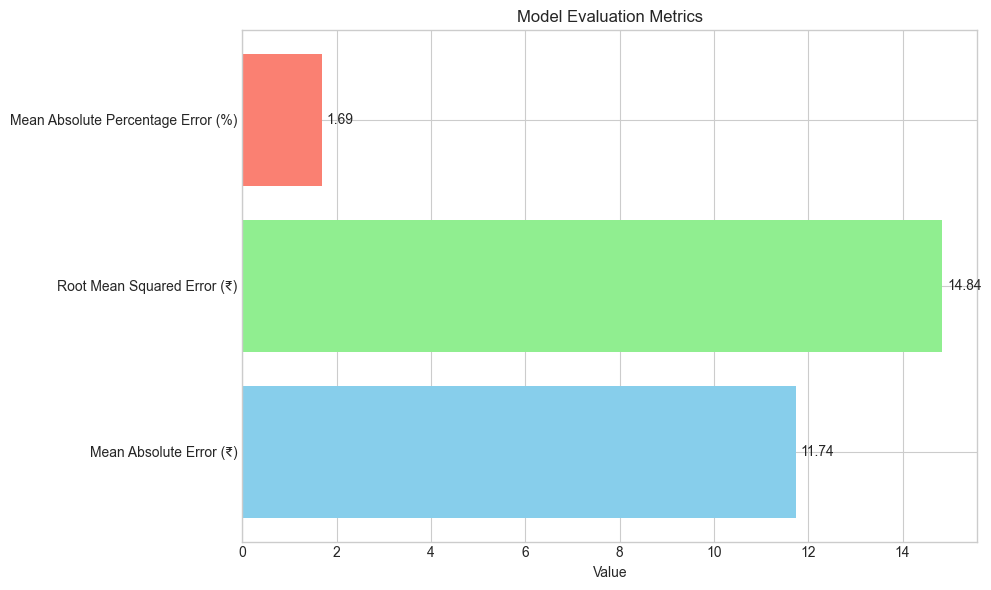

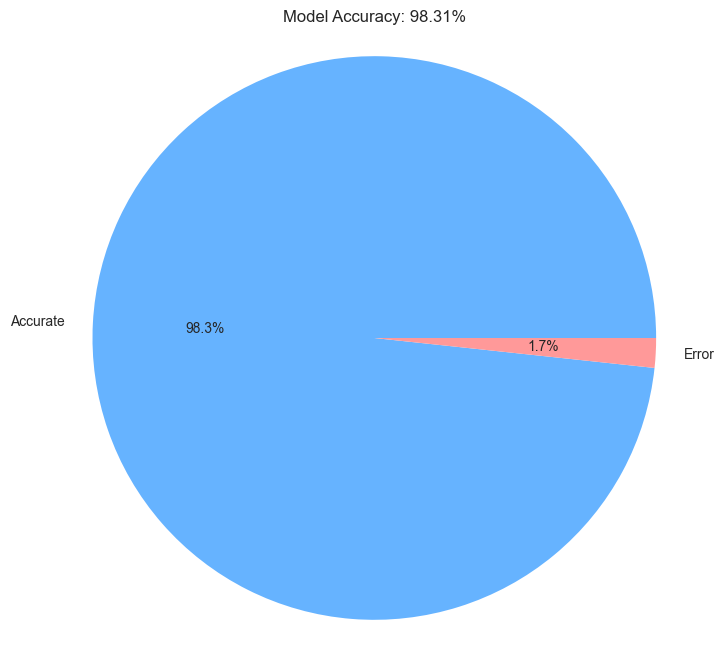

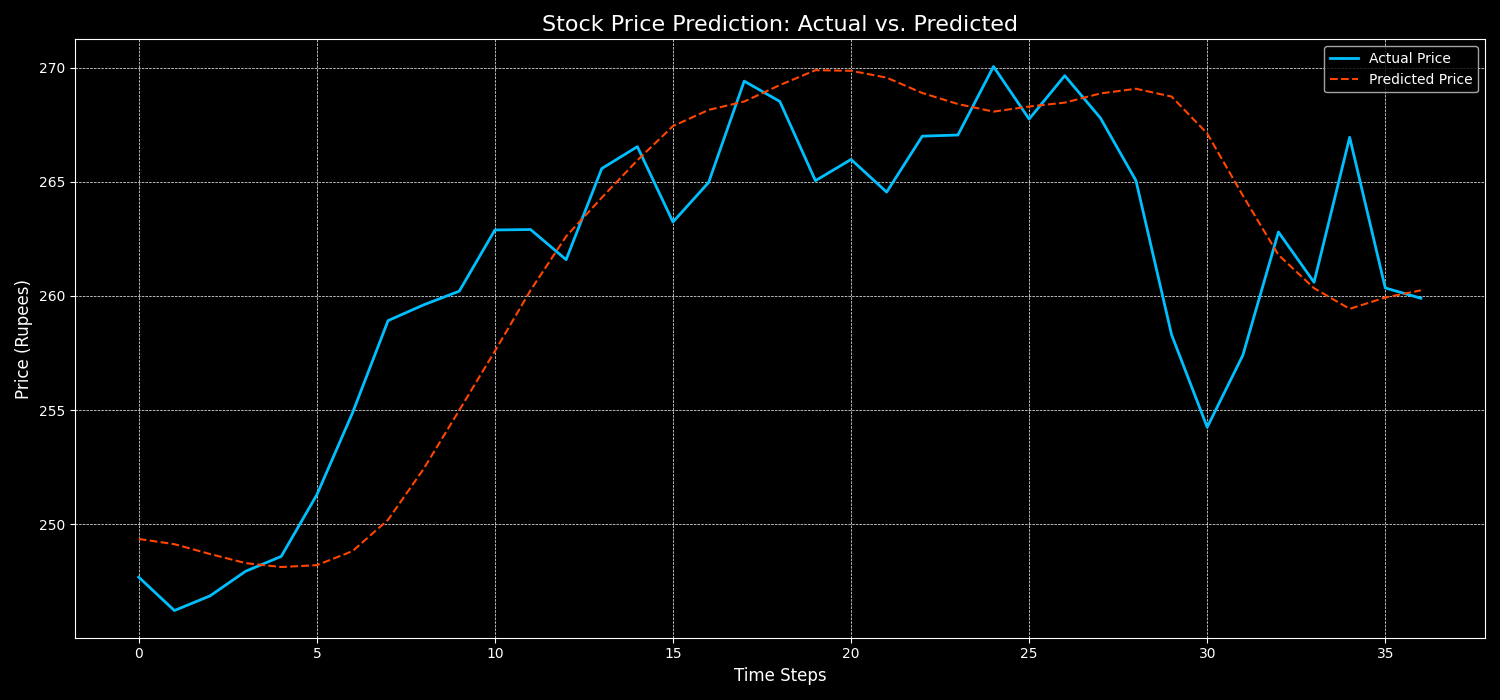

This is the prediction visualization saved at: visualizations\prediction_visualization.png


In [56]:
# Visualize the metrics
plt.figure(figsize=(10, 6))

# Create a horizontal bar chart
metrics_to_plot = ['mae_in_rupees', 'rmse_in_rupees', 'mape_percentage']
metric_labels = ['Mean Absolute Error (₹)', 'Root Mean Squared Error (₹)', 'Mean Absolute Percentage Error (%)']
values = [metrics[m] for m in metrics_to_plot]

plt.barh(metric_labels, values, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Model Evaluation Metrics')
plt.xlabel('Value')
plt.grid(True, axis='x')

# Add the values at the end of each bar
for i, v in enumerate(values):
    plt.text(v + 0.1, i, f"{v:.2f}", va='center')

plt.tight_layout()
plt.show()

# Also show the accuracy as a pie chart
plt.figure(figsize=(8, 8))
accuracy = metrics['accuracy_percentage']
plt.pie([accuracy, 100-accuracy], labels=['Accurate', 'Error'], autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.title(f'Model Accuracy: {accuracy:.2f}%')
plt.axis('equal')
plt.show()

# Display the saved prediction visualization (check multiple possible locations)
prediction_viz_paths = [
    os.path.join('visualizations', 'prediction_visualization.png'),
    os.path.join('artifacts', 'model_evaluation', 'visualizations', 'prediction_visualization.png')
]

viz_found = False
for path in prediction_viz_paths:
    if os.path.exists(path):
        display(Image(filename=path))
        print(f"This is the prediction visualization saved at: {path}")
        viz_found = True
        break

if not viz_found:
    print(f"Prediction visualization file not found in any of the expected locations.")
    print(f"Expected at: {prediction_viz_paths}")

## Conclusion and What I Learned

This project has been quite a journey for me as a beginner in data science and MLOps! Here's what I've learned:

### What Worked Well
- **LSTM Models**: These are really good at capturing patterns in time series data like stock prices.
- **MLOps Pipeline**: Breaking down the project into stages made it easier to understand and debug.
- **Standardization**: Scaling the data made a big difference in model performance.

### Challenges I Faced
- **Understanding Time Series Data**: It was hard at first to grasp concepts like stationarity and differencing.
- **Model Selection**: Trying to figure out which model would work best was challenging.
- **Training Efficiency**: The current approach of training a model for each prediction is slow. This led me to the next evolution of the project.

### Next Steps: Scaling with a Pre-Trained Model
My primary focus for scaling this project is to build a **pre-trained model for Index stock prediction**. This is a significant enhancement that will:
- **Increase Speed**: Predictions will be much faster since we won't need to train a model every time.
- **Improve Consistency**: A single, robust pre-trained model will provide more consistent predictions.
- **Enhance Accuracy**: The model can be trained on a much larger and more diverse dataset, leading to better accuracy.

I will also explore:
- More advanced feature engineering approaches specific to financial data.
- Including external factors like news sentiment or market indices.
- Creating a more user-friendly web interface for the predictions.

The shift to a pre-trained model is the key to making this project more practical and powerful.

Overall, I'm proud of what I've built! This project has been a fantastic learning experience, and I now have a working stock price prediction system that I'm excited to scale. This notebook documents my learning journey and hopefully can help other beginners see that you don't need to be an expert to start working with machine learning and financial data. The key is to start, experiment, learn from mistakes, and keep improving!